<a href="https://colab.research.google.com/github/ZoiliEDU/BuscandoANemoCNN/blob/main/BuscandoANemoCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Buscando a Nemo Red Neuronal Convolucional***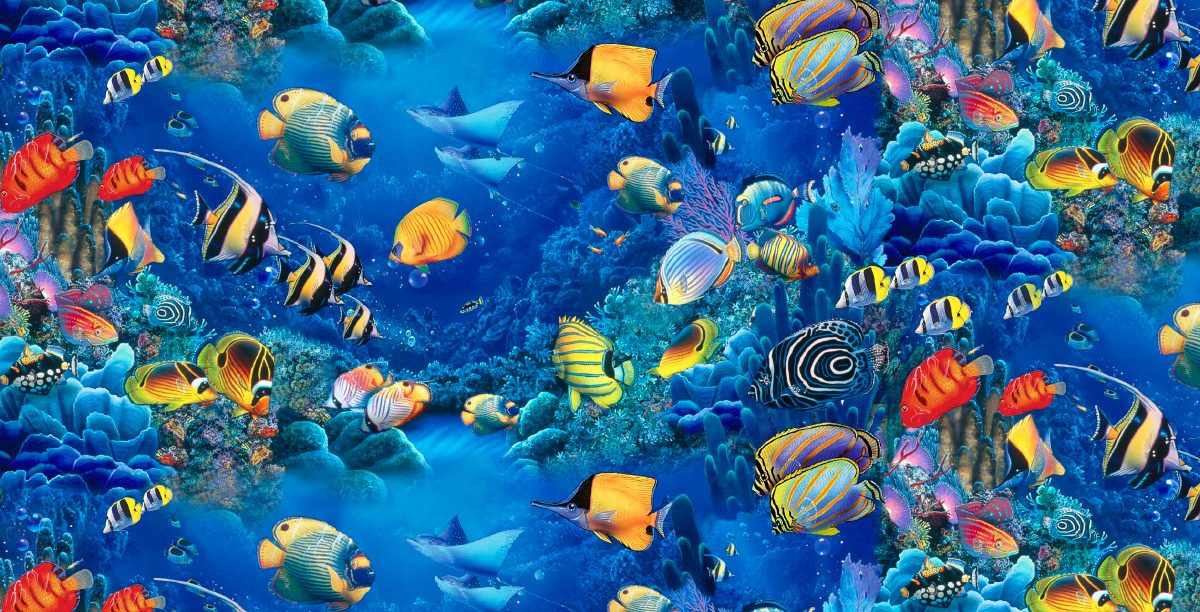

## ***Este proyecto hara uso de una red neuronal convolucional para la detecteccion de peces***

### ***Bibliotecas***

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

### ***Google Drive***

In [ ]:
from google.colab import drive
from IPython.display import Image
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### ***Creacion de CNN***

In [ ]:
model = Sequential()
#Primer capa
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
#Segunda capa
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

### ***Entrenar a la Inteligencia Artificial***

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_data = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_data.flow_from_directory('/content/drive/MyDrive/Topicos pescado/Basedatos/entrenamiento',
                                                 target_size = (64, 64), batch_size = 32, class_mode = 'binary')

test_set = test_data.flow_from_directory('/content/drive/MyDrive/Topicos pescado/Basedatos/testeo',
                                            target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### ***Entrenamiento***

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(training_set, steps_per_epoch = int(8000/40), epochs = 30, validation_data = test_set, validation_steps = int(2000/40))

Epoch 1/30
200/200 [==============================] - 110s 549ms/step - loss: 1.4781e-04 - accuracy: 1.0000 - val_loss: 8.4814e-07 - val_accuracy: 1.0000
Epoch 2/30
200/200 [==============================] - 112s 558ms/step - loss: 0.0087 - accuracy: 0.9978 - val_loss: 0.0063 - val_accuracy: 0.9981
Epoch 3/30
200/200 [==============================] - 110s 548ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 1.5247e-05 - val_accuracy: 1.0000
Epoch 4/30
200/200 [==============================] - 110s 553ms/step - loss: 4.7438e-04 - accuracy: 0.9998 - val_loss: 2.7081e-05 - val_accuracy: 1.0000
Epoch 5/30
200/200 [==============================] - 109s 545ms/step - loss: 5.4672e-05 - accuracy: 1.0000 - val_loss: 2.3498e-06 - val_accuracy: 1.0000
Epoch 6/30
200/200 [==============================] - 109s 543ms/step - loss: 1.9641e-05 - accuracy: 1.0000 - val_loss: 1.4042e-06 - val_accuracy: 1.0000
Epoch 7/30
200/200 [==============================] - 109s 545ms/step - loss: 1.7048e-05

### ***Prueba***

In [ ]:
import numpy as np
from keras_preprocessing import image

In [ ]:
test_image = image.load_img('/content/drive/MyDrive/Topicos pescado/Basedatos/Para_Predecir/Angel¿.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Pez Payaso'
else:
    prediction = 'Pez Angel'

1/1 [==============================] - 0s 22ms/step


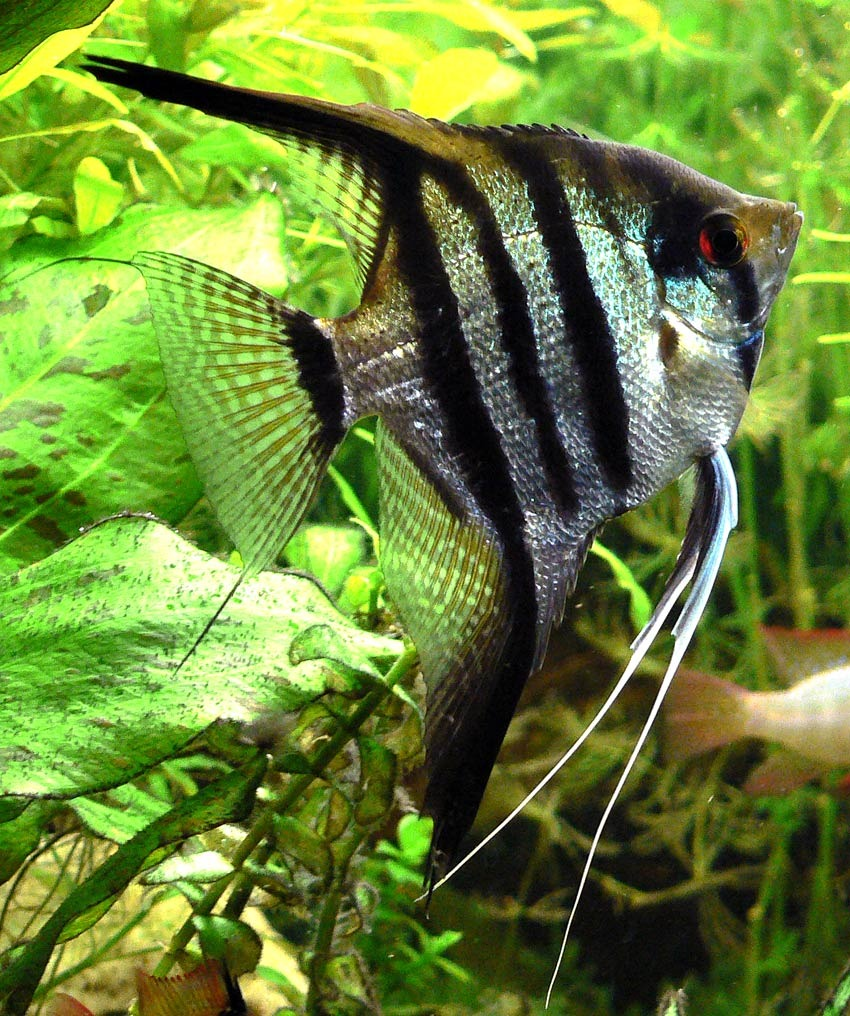

In [ ]:
Image(filename='/content/drive/MyDrive/Topicos pescado/Basedatos/Para_Predecir/Angel¿.jpg',width=250,height=250)

### ***Resultado***

In [ ]:
print(prediction)

Pez Angel
